In [1]:
import fastbook
from fastai.vision.all import *
from fastbook import *

In [2]:
matplotlib.rc('image', cmap='Greys')

In [3]:
path = untar_data(URLs.MNIST_SAMPLE)

In [4]:
Path.BASE_PATH = path

In [5]:
path.ls()

(#3) [Path('train'),Path('valid'),Path('labels.csv')]

In [6]:
(path/'train').ls()

(#2) [Path('train/7'),Path('train/3')]

In [7]:
threes = (path/'train'/'3').ls().sorted() # use sorted to ensure we get the same order of files
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [8]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [11]:
array(im3)[4:10, 4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [12]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [13]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors), len(seven_tensors)

(6131, 6265)

<AxesSubplot:>

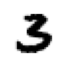

In [14]:
# fastai function show_image needed, since we now have tensors
# jupyter defaults to showing tensors as printed values
show_image(three_tensors[20])

In [16]:
# combine all the images in a list into a three-dim tensor
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape # 6131 images, each of size 28x28 pixels

torch.Size([6131, 28, 28])

In [17]:
# length of a tensor's shape is its rank
len(stacked_threes.shape) # rank is the number of dimensions in a tensor

3

In [18]:
# can also get rank directly
stacked_threes.ndim

3

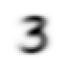

In [19]:
# calculate mean of all image tensors by taking mean along dimension 0
mean3 = stacked_threes.mean(0)
show_image(mean3);

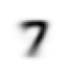

In [20]:
mean7 = stacked_sevens.mean(0)
show_image(mean7);

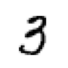

In [22]:
# sample 3
a_3 = stacked_threes[10]
show_image(a_3);

In [23]:
# try both L1 and L2 norm
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs, dist_3_sqr

(tensor(0.1100), tensor(0.2018))

In [24]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs,dist_7_sqr

(tensor(0.1556), tensor(0.2989))

In [25]:
# pytorch already provides these as loss functions
# available under torch.nn.functional, imported as F
F.l1_loss(a_3.float(), mean7), F.mse_loss(a_3, mean7).sqrt()

(tensor(0.1556), tensor(0.2989))

In [26]:
data = [[1,2,3],[4,5,6]]
arr = array(data)
tns = tensor(data)

In [27]:
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [28]:
tns

tensor([[1, 2, 3],
        [4, 5, 6]])

In [31]:
tns[1,2]

tensor(6)

In [30]:
tns[:,1]

tensor([2, 5])

In [32]:
tns.type()

'torch.LongTensor'

In [33]:
# create a validation set from directory
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [35]:
# calculates mean absolute error
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_3, mean3)

tensor(0.1100)

In [36]:
# broadcasting
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1261, 0.1198, 0.1818,  ..., 0.1426, 0.1623, 0.1440]),
 torch.Size([1010]))

In [37]:
def is_3(x): return mnist_distance(x, mean3) < mnist_distance(x, mean7)

In [38]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [39]:
is_3(valid_3_tens)

tensor([ True,  True, False,  ...,  True,  True,  True])

In [41]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()
accuracy_3s,accuracy_7s,(accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

In [42]:
xt = tensor(3.).requires_grad_()
# tags the varibale, so pytorch will remember to keep track of how to compute gradients

In [43]:
def f(x): return x**2

In [44]:
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [45]:
yt.backward()

In [46]:
xt.grad

tensor(6.)

## End-to-end SGD example

In [87]:
time = torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

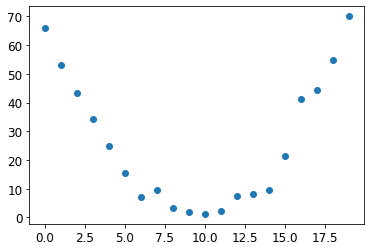

In [88]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time, speed);

In [89]:
# restricted capacity to quadratic function, need to find parameters a,b,c
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [90]:
def mse(preds, targets): return ((preds - targets)**2).mean().sqrt()

In [91]:
# initialise parameters
params = torch.randn(3).requires_grad_()
params

tensor([-0.7409,  0.3618,  1.9199], requires_grad=True)

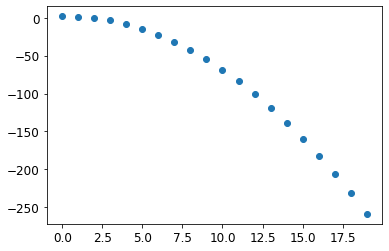

In [92]:
# use current params to predict the values at each time step
preds = f(time, params)
preds_plot = preds.detach().numpy()
preds_plot = preds_plot.tolist()
plt.scatter(time, preds_plot)

In [93]:
# calculate the loss of the current model
loss = mse(preds, speed)
loss

tensor(144.4233, grad_fn=<SqrtBackward>)

In [94]:
loss.backward() # to calculate the gradients, we call backward() on the loss
# this loss was itself calculated by mse, which was calculated using f taking as input params
# params was the object on which we originally called required_grads_

In [95]:
params.grad

tensor([-165.2907,  -10.5516,   -0.7762])

In [96]:
params.grad * 1e-5

tensor([-1.6529e-03, -1.0552e-04, -7.7624e-06])

In [97]:
# step the weights
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [98]:
# see if the loss has improved
preds = f(time, params)
mse(preds, speed)

tensor(144.1489, grad_fn=<SqrtBackward>)

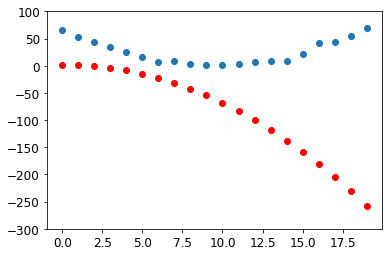

In [99]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)
    
show_preds(preds)

In [117]:
# repeat
def apply_step(params, prn=True, num_epochs=10000):
    for i in range(num_epochs):
        preds = f(time, params)
        loss = mse(preds, speed)
        loss.backward()
        params.data -= lr * params.grad.data
        params.grad = None
        if prn: print(loss.item())
    return preds, loss

In [118]:
preds, loss = apply_step(params, prn=False)

In [119]:
loss

tensor(24.4996, grad_fn=<SqrtBackward>)

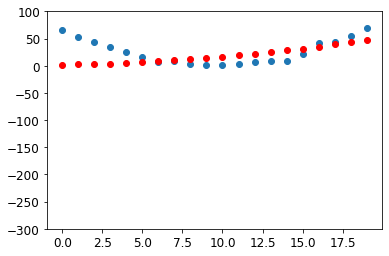

In [120]:
show_preds(preds)

## Back to MNIST

In [122]:
# concatenate into single tensor, and change them from a list of matrices to a list of vectors
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [123]:
# need a label for each image
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_x.shape, train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [125]:
# a dataset in pytorch is required to return a tuple of (x,y) when indexed
# use zip function to do this
dset = list(zip(train_x, train_y))
x,y = dset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

In [126]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

In [127]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

In [128]:
weights = init_params((28*28,1))

In [130]:
weights.shape

torch.Size([784, 1])

In [131]:
bias = init_params(1)

In [132]:
# calculate prediction for one image
(train_x[0]*weights.T).sum() + bias

tensor([3.7602], grad_fn=<AddBackward0>)

In [134]:
def linear1(xb): return xb@weights + bias
preds = linear1(train_x)
preds

tensor([[ 3.7602],
        [10.0223],
        [15.1395],
        ...,
        [ 4.7646],
        [ 1.8502],
        [ 3.3399]], grad_fn=<AddBackward0>)

In [135]:
corrects = (preds>0.5).float() == train_y
corrects

tensor([[ True],
        [ True],
        [ True],
        ...,
        [False],
        [False],
        [False]])

In [140]:
corrects.float().mean().item()

0.4831397235393524

In [144]:
trgs = tensor([1,0,1])
prds = tensor([0.9, 0.4, 0.2])

In [145]:
def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [146]:
torch.where(trgs==1, 1-prds, prds)

tensor([0.1000, 0.4000, 0.8000])

In [148]:
mnist_loss(prds, trgs)

tensor(0.4333)

In [149]:
mnist_loss(tensor([0.9, 0.4, 0.8]), trgs)

tensor(0.2333)

In [150]:
# mnist loss assumes predictions are always between 0 and 1
# use sigmoid to ensure that this is the case
def sigmoid(x): return 1/(1+torch.exp(-x))

/opt/conda/lib/python3.7/site-packages/fastbook/__init__.py:73: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  /pytorch/aten/src/ATen/native/RangeFactories.cpp:25.)
  x = torch.linspace(min,max)


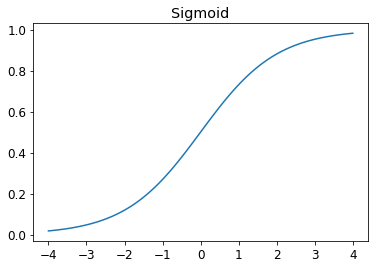

In [151]:
plot_function(torch.sigmoid, title='Sigmoid', min=-4, max=4)

In [152]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [154]:
# a DataLoader can take any Python collection and turn it into an iterator over many batches
col1 = range(15)
dl = DataLoader(col1, batch_size=5, shuffle=True)
list(dl)

[tensor([ 8,  9,  5, 11,  4]),
 tensor([ 7, 13, 14,  2,  3]),
 tensor([ 6, 12, 10,  1,  0])]

In [155]:
# for training a model we don't just want any Python collection
# we want a colllection containing independent and dependent variables 
# collection containing tuples of independent and dependent variables is known as Dataset
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [157]:
# when we pass a dataset to a DataLoader, we will get back many batches which are tuples of
# tensors, representing batches of independent and dependent variables
dl = DataLoader(ds, batch_size=6, shuffle=True)
list(dl)

[(tensor([20,  8,  2,  5, 12, 17]), ('u', 'i', 'c', 'f', 'm', 'r')),
 (tensor([19, 14, 15, 16, 11,  1]), ('t', 'o', 'p', 'q', 'l', 'b')),
 (tensor([23, 25,  0, 22,  6,  4]), ('x', 'z', 'a', 'w', 'g', 'e')),
 (tensor([ 3, 21, 24, 18,  9,  7]), ('d', 'v', 'y', 's', 'j', 'h')),
 (tensor([10, 13]), ('k', 'n'))]

In [158]:
weights = init_params((28*28,1))
bias = init_params(1)

In [159]:
# a DataLoader can be created from a Dataset
dl = DataLoader(dset, batch_size=256)
xb, yb = first(dl)
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [160]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [161]:
# create a mini-batch of size 4 for testing
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [162]:
preds = linear1(batch)
preds

tensor([[ 9.7460],
        [14.8540],
        [ 6.6535],
        [11.8257]], grad_fn=<AddBackward0>)

In [165]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.0003, grad_fn=<MeanBackward0>)

In [166]:
loss.backward()
weights.grad.shape, weights.grad.mean(), bias.grad

(torch.Size([784, 1]), tensor(-4.8543e-05), tensor([-0.0003]))

In [167]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [168]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

(tensor(-9.7085e-05), tensor([-0.0007]))

In [169]:
# what happens if we call it twice?
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

(tensor(-0.0001), tensor([-0.0010]))

In [170]:
# need to set the gradients to 0 first
weights.grad.zero_()
bias.grad.zero_()

tensor([0.])

In [171]:
def train_epoch(model, lr, params):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr # assign to the data attribute of the tensor, won't take gradient
            p.grad.zero_()

In [177]:
# check how we're doing by looking at accuracy of validation set
(preds>0.0).float() == train_y[:4]

tensor([[True],
        [True],
        [True],
        [True]])

In [173]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

In [176]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(1.)

In [178]:
# put the batches together
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb, yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [179]:
validate_epoch(linear1)

0.6553

In [180]:
# train for one epoch, see if accuracy improves
lr = 1.
params = weights,bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.7372

In [181]:
for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.8886 0.9321 0.9457 0.954 0.9584 0.9599 0.9623 0.9643 0.9648 0.9662 0.9672 0.9677 0.9682 0.9697 0.9702 0.9702 0.9706 0.9716 0.9721 0.9721 

In [182]:
## replace our linear1 function with nn.Linear module
# does the same thing as init_params and linear together
# contains both the weights and bias in a single class
linear_model = nn.Linear(28*28,1)

In [183]:
# trainable parameters
w,b = linear_model.parameters()
w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [184]:
# create an optimiser
class BasicOptim:
    def __init__(self,params,lr): self.params, self.lr = list(params), lr
        
    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr
            
    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

In [185]:
# create our optimiser by passing in the model's parameters
opt = BasicOptim(linear_model.parameters(), lr)

In [186]:
def train_epoch(model):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [187]:
validate_epoch(linear_model)

0.4564

In [188]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [189]:
train_model(linear_model, 20)

0.4932 0.7354 0.8564 0.9179 0.9346 0.9487 0.957 0.9638 0.9658 0.9673 0.9692 0.9717 0.9746 0.9746 0.9761 0.9765 0.9775 0.9775 0.978 0.9785 

In [190]:
# fastai provides the SGD class which does the same thing as our BasicOptim
linear_model = nn.Linear(28*28, 1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.4932 0.8091 0.8481 0.916 0.9336 0.9487 0.956 0.9638 0.9663 0.9682 0.9692 0.9721 0.9736 0.9751 0.9761 0.977 0.9775 0.978 0.978 0.9785 

In [191]:
dls = DataLoaders(dl, valid_dl)

In [192]:
# to create a learner, we need to pass in:
    # DataLoaders
    # the model
    # the optimisation function (which will be passed the parameters)
    # the loss function
    # any metrics to print
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD,
               loss_func=mnist_loss, metrics=batch_accuracy)

In [193]:
learn.fit(10, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.636906,0.503421,0.495584,00:00
1,0.496982,0.187503,0.842983,00:00
2,0.183158,0.182068,0.834151,00:00
3,0.080887,0.107829,0.909225,00:00
4,0.043171,0.078633,0.932287,00:00
5,0.028410,0.062906,0.945535,00:00
6,0.022320,0.053116,0.954858,00:00
7,0.019599,0.046606,0.963199,00:00
8,0.018211,0.042043,0.965653,00:00
9,0.017374,0.038695,0.966634,00:00


In [194]:
# adding a non-linearity
def simple_net(xb):
    res = xb@w1 + b1
    res = res.max(tensor(0.0))
    res = res@w2 + b2
    return res

In [195]:
w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params((30,1))
b2 = init_params(1)

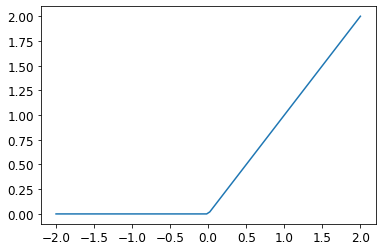

In [196]:
plot_function(F.relu)

In [197]:
simple_net = nn.Sequential(nn.Linear(28*28,30),
                          nn.ReLU(),
                          nn.Linear(30,1))

In [198]:
learn = Learner(dls, simple_net, opt_func=SGD,
               loss_func = mnist_loss, metrics=batch_accuracy)

In [199]:
learn.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.304471,0.416420,0.504907,00:00
1,0.143818,0.227532,0.806183,00:00
2,0.080216,0.114496,0.916094,00:00
3,0.053045,0.077414,0.940137,00:00
4,0.040341,0.060440,0.955839,00:00
5,0.033802,0.050931,0.963199,00:00
6,0.030029,0.044958,0.964671,00:00
7,0.027572,0.040888,0.967125,00:00
8,0.025800,0.037934,0.969578,00:00
9,0.024428,0.035679,0.970559,00:00


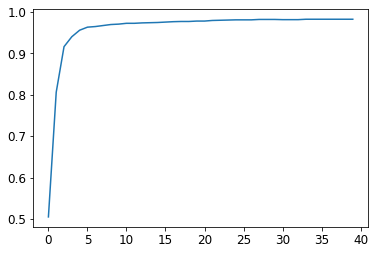

In [200]:
plt.plot(L(learn.recorder.values).itemgot(2));

In [201]:
learn.recorder.values[-1][2]

0.98233562707901

In [202]:
dls = ImageDataLoaders.from_folder(path)
learn = cnn_learner(dls, resnet18, pretrained=False,
                   loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,accuracy,time
0,0.123148,0.035868,0.991659,00:09
